In [12]:
import numpy as np
import pandas as pd

# Data Wrangling II

* **Stack** e **Unstack**

#### Stack 

Usado para converter colunas de um DataFrame em índices, resultando em uma reorganização dos dados de formato "largo" (wide) para formato "longo" (long). Ela empilha as colunas selecionadas, movendo-as para o índice mais interno 

![Alt text](image.png)

#### Exemplo:

* Stack 

![Alt text](<Captura de tela 2023-09-17 175804.png>)


##### Unstack

A Função unstack é o oposto da função stack. Ela desempilha os dados de um DataFrame de formato "longo" para "largo", movendo índices internos para as colunas correspondentes, reorganizando o DataFrame para o formato mais tubular. 

![Alt text](image-1.png)



##### Exemplo:

* Unstack

![Alt text](<Captura de tela 2023-09-17 180107.png>)

#### Explode

É usado para transformar listas (ou outras estruturas de dados semelhantes a listas) que estão contidas em uma coluna DataFrame em linhas separadas, replicando os valores das outras colunas correspondentes. 

![Alt text](<Captura de tela 2023-09-17 180854.png>)

### Hora da Pratica 

In [19]:
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv('realtor-data.csv') #puxa/le o arquivo csv 

In [6]:
df.info() #apresentan  informações sobre o arquivo 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          100000 non-null  object 
 1   bed             75050 non-null   float64
 2   bath            75112 non-null   float64
 3   acre_lot        85987 non-null   float64
 4   city            99948 non-null   object 
 5   state           100000 non-null  object 
 6   zip_code        99805 non-null   float64
 7   house_size      75082 non-null   float64
 8   prev_sold_date  28745 non-null   object 
 9   price           100000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 7.6+ MB


In [7]:
df.head(5) # pega as primeiras 5 linhas

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [9]:
# Para realizar um exemplo de stack e unstack vai ser feito inicialmente um groupby. 
# Vamos realizar um groupby onde iremos realizar uma media dos valores das casas dos estados e cidades 

# pegue os dados do csv que estão como df ( dataframe) e groupby -> Agrupe os dados -> (['Das colulnas State', 'E city])['pegue o campo price'].mean(faça a média)

df.groupby(['state', 'city'])['price'].mean()  

state           city        
Connecticut     Andover         2.492542e+05
                Ashford         2.849269e+05
                Avon            6.070604e+05
                Barkhamsted     3.752788e+05
                Berlin          3.484531e+05
                                    ...     
Virgin Islands  Frederiksted    7.014767e+05
                Kingshill       4.578320e+05
                Saint John      1.003303e+06
                Saint Thomas    1.169000e+06
Virginia        Chincoteague    7.500000e+04
Name: price, Length: 582, dtype: float64

In [10]:
# podemos realizar um df sumarizado 

df_sum = pd.DataFrame(df.groupby(['state', 'city'])['price'].mean())

In [11]:
df_sum

# No exemplo a baixo, vejá que há somente uma coluna a Price, a coluna state e city estão como indice 

price
state          city                      
Connecticut    Andover       2.492542e+05
               Ashford       2.849269e+05
               Avon          6.070604e+05
               Barkhamsted   3.752788e+05
               Berlin        3.484531e+05
...                                   ...
Virgin Islands Frederiksted  7.014767e+05
               Kingshill     4.578320e+05
               Saint John    1.003303e+06
               Saint Thomas  1.169000e+06
Virginia       Chincoteague  7.500000e+04

[582 rows x 1 columns]

In [12]:
df_sum.index

#veja que o resultado é um multiIndex

MultiIndex([(   'Connecticut',       'Andover'),
            (   'Connecticut',       'Ashford'),
            (   'Connecticut',          'Avon'),
            (   'Connecticut',   'Barkhamsted'),
            (   'Connecticut',        'Berlin'),
            (   'Connecticut',     'Bethlehem'),
            (   'Connecticut',    'Bloomfield'),
            (   'Connecticut',        'Bolton'),
            (   'Connecticut',        'Bozrah'),
            (   'Connecticut',       'Bristol'),
            ...
            (       'Vermont',    'Whitingham'),
            (       'Vermont',    'Wilmington'),
            (       'Vermont',       'Winhall'),
            (       'Vermont',      'Woodford'),
            ('Virgin Islands', 'Christiansted'),
            ('Virgin Islands',  'Frederiksted'),
            ('Virgin Islands',     'Kingshill'),
            ('Virgin Islands',    'Saint John'),
            ('Virgin Islands',  'Saint Thomas'),
            (      'Virginia',  'Chincoteague')],
   

In [14]:
df_sum.head()

price
state       city                      
Connecticut Andover      249254.166667
            Ashford      284926.865672
            Avon         607060.414013
            Barkhamsted  375278.787879
            Berlin       348453.061224

* **Exemplo Stack e Unstack**

Obs: Lemando que foi necessario criar um groupby acima:

In [13]:
# Agora vamos para o exemplo Stack
# Veja que a coluna price, se tornou um indice 
# Então o comando pega uma coluna e adiciona ao conjunto de index

df_sum.stack()

state           city               
Connecticut     Andover       price    2.492542e+05
                Ashford       price    2.849269e+05
                Avon          price    6.070604e+05
                Barkhamsted   price    3.752788e+05
                Berlin        price    3.484531e+05
                                           ...     
Virgin Islands  Frederiksted  price    7.014767e+05
                Kingshill     price    4.578320e+05
                Saint John    price    1.003303e+06
                Saint Thomas  price    1.169000e+06
Virginia        Chincoteague  price    7.500000e+04
Length: 582, dtype: float64

In [16]:
df_stack = pd.DataFrame(df_sum.stack())

df_stack

0
state          city                            
Connecticut    Andover      price  2.492542e+05
               Ashford      price  2.849269e+05
               Avon         price  6.070604e+05
               Barkhamsted  price  3.752788e+05
               Berlin       price  3.484531e+05
...                                         ...
Virgin Islands Frederiksted price  7.014767e+05
               Kingshill    price  4.578320e+05
               Saint John   price  1.003303e+06
               Saint Thomas price  1.169000e+06
Virginia       Chincoteague price  7.500000e+04

[582 rows x 1 columns]

In [18]:
# Então o comando pega uma coluna e adiciona ao conjunto de index

df_stack.index

MultiIndex([(   'Connecticut',       'Andover', 'price'),
            (   'Connecticut',       'Ashford', 'price'),
            (   'Connecticut',          'Avon', 'price'),
            (   'Connecticut',   'Barkhamsted', 'price'),
            (   'Connecticut',        'Berlin', 'price'),
            (   'Connecticut',     'Bethlehem', 'price'),
            (   'Connecticut',    'Bloomfield', 'price'),
            (   'Connecticut',        'Bolton', 'price'),
            (   'Connecticut',        'Bozrah', 'price'),
            (   'Connecticut',       'Bristol', 'price'),
            ...
            (       'Vermont',    'Whitingham', 'price'),
            (       'Vermont',    'Wilmington', 'price'),
            (       'Vermont',       'Winhall', 'price'),
            (       'Vermont',      'Woodford', 'price'),
            ('Virgin Islands', 'Christiansted', 'price'),
            ('Virgin Islands',  'Frederiksted', 'price'),
            ('Virgin Islands',     'Kingshill', 'price')

In [19]:
# veja os indices do dataframe bruto - csv

df.index

RangeIndex(start=0, stop=100000, step=1)

In [20]:
#Agora realizando um Unstack o Price volta a se tornar coluna da variavel média do preço

df_stack.unstack()

0
                                    price
state          city                      
Connecticut    Andover       2.492542e+05
               Ashford       2.849269e+05
               Avon          6.070604e+05
               Barkhamsted   3.752788e+05
               Berlin        3.484531e+05
...                                   ...
Virgin Islands Frederiksted  7.014767e+05
               Kingshill     4.578320e+05
               Saint John    1.003303e+06
               Saint Thomas  1.169000e+06
Virginia       Chincoteague  7.500000e+04

[582 rows x 1 columns]

* Novo exemplo com DataFrame ficticio 

In [21]:

# df_ex = Nome da variavel dataframe 
# pd.DataFrame = pd (modulo) DataFrame (classe)
# {} dentro está sendo colocado os nomes das coluna 
# [] dentro está sendo colocado os valores 

df_ex = pd.DataFrame({'Valor1':[1,2,3,4], 'Valor2': [5,6,7,8]})

df_ex

,Valor1,Valor2
0,1,5
1,2,6
2,3,7
3,4,8


In [22]:
df_ex.stack()

# Realizado o stack veja que as colunas se tornaram indices 

# Retorou uma unica coluna, com essas categorias e uma outra coluna com os valores

0  Valor1    1
   Valor2    5
1  Valor1    2
   Valor2    6
2  Valor1    3
   Valor2    7
3  Valor1    4
   Valor2    8
dtype: int64

In [23]:
pd.DataFrame(df_ex.stack())

0
0 Valor1  1
  Valor2  5
1 Valor1  2
  Valor2  6
2 Valor1  3
  Valor2  7
3 Valor1  4
  Valor2  8

In [24]:
pd.DataFrame(df_ex.stack()).index

MultiIndex([(0, 'Valor1'),
            (0, 'Valor2'),
            (1, 'Valor1'),
            (1, 'Valor2'),
            (2, 'Valor1'),
            (2, 'Valor2'),
            (3, 'Valor1'),
            (3, 'Valor2')],
           )

In [25]:
pd.DataFrame(df_ex.stack()).reset_index()

,level_0,level_1,0
0,0,Valor1,1
1,0,Valor2,5
2,1,Valor1,2
3,1,Valor2,6
4,2,Valor1,3
5,2,Valor2,7
6,3,Valor1,4
7,3,Valor2,8


In [26]:
pd.DataFrame(df_ex.stack()).reset_index(level=1)

,level_1,0
0,Valor1,1
0,Valor2,5
1,Valor1,2
1,Valor2,6
2,Valor1,3
2,Valor2,7
3,Valor1,4
3,Valor2,8


* **Exemplo do Explode**

In [28]:
teds = ['Ted Joao', 'Ted Maria', 'Ted Marcos']
tags = [['saude', 'alimentação'], ['Esporte', 'Corrida', 'Competição'], ['Cursos', 'Tecnologia']]

print(teds)
print(tags)

['Ted Joao', 'Ted Maria', 'Ted Marcos']
[['saude', 'alimentação'], ['Esporte', 'Corrida', 'Competição'], ['Cursos', 'Tecnologia']]


In [32]:
df_ex2 = pd.DataFrame({'TED': teds, 'Tags': tags })

In [33]:
df_ex2

,TED,Tags
0,Ted Joao,"[saude, alimentação]"
1,Ted Maria,"[Esporte, Corrida, Competição]"
2,Ted Marcos,"[Cursos, Tecnologia]"


In [34]:
df_ex2.explode('Tags')

,TED,Tags
0,Ted Joao,saude
0,Ted Joao,alimentação
1,Ted Maria,Esporte
1,Ted Maria,Corrida
1,Ted Maria,Competição
2,Ted Marcos,Cursos
2,Ted Marcos,Tecnologia


In [35]:
df_ex2.explode('Tags').value_counts()


TED         Tags       
Ted Joao    alimentação    1
            saude          1
Ted Marcos  Cursos         1
            Tecnologia     1
Ted Maria   Competição     1
            Corrida        1
            Esporte        1
Name: count, dtype: int64

In [36]:
df_ex2.explode('Tags')['Tags'].value_counts()

Tags
saude          1
alimentação    1
Esporte        1
Corrida        1
Competição     1
Cursos         1
Tecnologia     1
Name: count, dtype: int64

In [37]:
# ex2 

teds2 = ['Ted Joao', 'Ted Maria', 'Ted Marcos']
tags2 = [['saude', 'alimentação'], ['Esporte', 'Corrida', 'Competição', 'alimentação'], ['Cursos', 'Tecnologia']]

df_exx2 = pd.DataFrame({'TED': teds2, 'Tags': tags2 })

df_exx2

,TED,Tags
0,Ted Joao,"[saude, alimentação]"
1,Ted Maria,"[Esporte, Corrida, Competição, alimentação]"
2,Ted Marcos,"[Cursos, Tecnologia]"


In [38]:
df_exx2.explode('Tags').value_counts()

TED         Tags       
Ted Joao    alimentação    1
            saude          1
Ted Marcos  Cursos         1
            Tecnologia     1
Ted Maria   Competição     1
            Corrida        1
            Esporte        1
            alimentação    1
Name: count, dtype: int64

In [40]:
df_exx2.explode('Tags')['Tags'].value_counts()

Tags
alimentação    2
saude          1
Esporte        1
Corrida        1
Competição     1
Cursos         1
Tecnologia     1
Name: count, dtype: int64

#### Pivot

A função pivot() retorna um novo DataFrame com a estrutura pivotada, onde os valores únicos da coluna especificada em colunis se tornam as colunas distintas, e os valores da coluna especificada em values são distribuídos nessas colunas. 

![Alt text](<Captura de tela 2023-09-17 234715.png>)

A função pivot() retorna um novo DataFrame com a estrutura pivotada, onde os valores únicos da coluna especificada em columns se tornam as colunas distintas, e os valores da coluna especificada em values são distribuídos nessas colunas

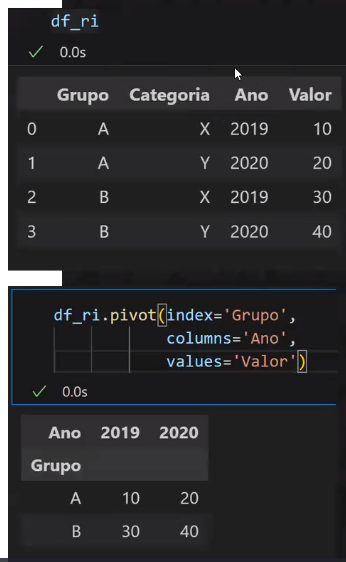


In [1]:
import seaborn as sns

In [2]:
df_sns = sns.load_dataset('glue')

In [3]:
df_sns

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


In [5]:
# Dataframe.funçao('Index', 'Coluna', 'Valores')
# df_sns.pivot('Model', 'Task', "Score")
df_sns.pivot(index='Model', columns='Task', values='Score')

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


In [6]:
df_pivot = df_sns.pivot(index='Model', columns='Task', values='Score')

<Axes: xlabel='Task', ylabel='Model'>

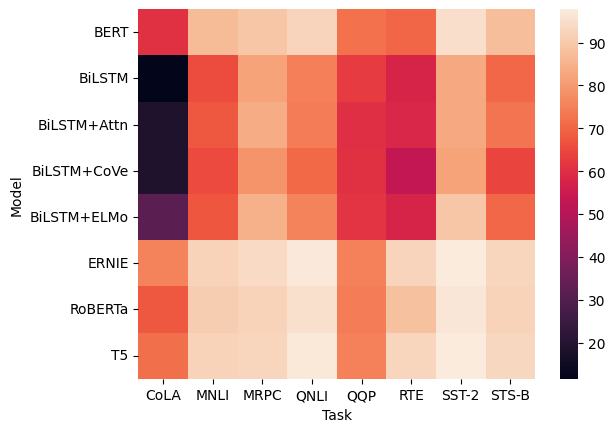

In [7]:
sns.heatmap(df_pivot) #Mapinha de calor

# Vemos qual modelo tem melhor  desempenho de acordo com as tarefas
# Quanto mais escuro, pior é o desempenho do modelo

### Pivot_table

A função pivot_table()permite calcular agregações de dados com base em uma ou mais colunas do DataFrame, fornecendo uma visão resumida dos dados em formato de tabela. É útil quando você precisa resumir e analisar dados de forma mais detalhada, agrupando-os e realizando cálculos de agregação com base em colunas específicas.

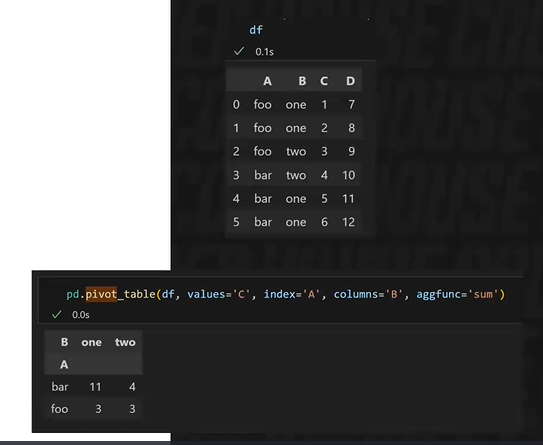

##### Difereça entre Pivot() e Pivot_table()

A função **pivot()** não permite duplicidade na combinação  de indice e coluna, se tiver duplicidade vai dar erro. Já a função **pivot_table()** permite você usar uma função de sumarização.

Exemplo

In [8]:
df_sns

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


In [10]:
df_sns.pivot(index='Model', columns='Year', values='Score')

# Veja que a saida abaixo apresenta erro, pois a função pivot não aceita valores duplicados no campo 'index' e 'coluna'.
# Conforme saida acima a coluna Model tem duplicidade de informações exemplo: BERT, BiLSTM+ELMo e etc. A coluna Year também como 2018, 2019  e etc

# log do erro ValueError: Index contains duplicate entries, cannot reshape

ValueError: Index contains duplicate entries, cannot reshape

In [13]:
# agora exemplo usando o pivot_table


# pd.pivot_table -> (pd) Chamando da biblioteca pandas a função pivot_table
# data -> conjunto de dados - > df_sns dataframe -> index, coluna, valore e a função de agregação que está fazendo a media


pd.pivot_table(data = df_sns, index= 'Model', columns='Year', values= 'Score', aggfunc='mean')

Year,2017,2018,2019
Model,,,
BERT,NaN,81.7375,NaN
BiLSTM,63.3250,NaN,NaN
BiLSTM+Attn,64.8375,NaN,NaN
BiLSTM+CoVe,61.6250,NaN,NaN
BiLSTM+ELMo,NaN,67.2000,NaN
ERNIE,NaN,NaN,89.7000
RoBERTa,NaN,NaN,87.2125
T5,NaN,NaN,89.0000


In [14]:
pd.pivot_table(data = df_sns, index= 'Task', columns='Year', values= 'Score', aggfunc='mean')


Year,2017,2018,2019
Task,,,
CoLA,16.233333,46.30,71.633333
MNLI,66.200000,76.95,91.766667
MRPC,81.466667,87.00,93.000000
QNLI,73.233333,84.10,96.533333
QQP,61.066667,66.60,74.866667
RTE,56.166667,63.75,91.200000
SST-2,82.566667,92.10,97.333333
STS-B,69.166667,78.95,92.766667


### Tipos de dados

*   dtypes
*   astype()

**dtypes** verifica o tipo de dado da coluna

**astype()** é usado para alterar o tipo de dado de uma coluna. Ela permite converter uma coluna para um tipo de dado diferente, como inteiro, ponto flutuante, string, data, entre outros.

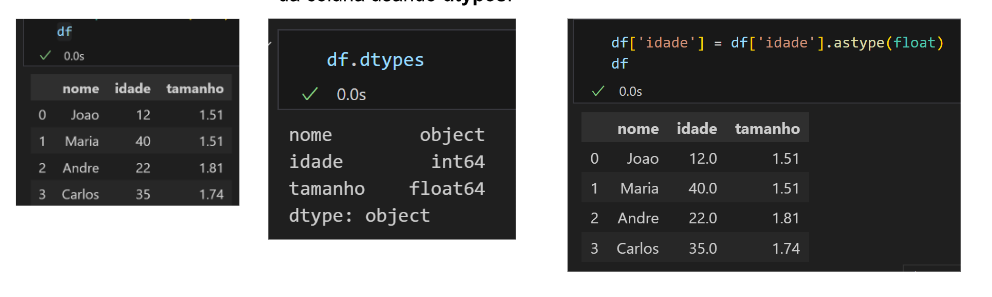





In [15]:
df_exx3 = pd.DataFrame({'nome': ['Joao', 'Maria', 'Andre', 'Carlos'], 'idade': [12,40,22,35], 'tamanho': [1.51, 1.51, 1.81, 1.74]})

# df_exx3 = Nome da variavel dataframe
# pd.DataFrame = pd (modulo) DataFrame (classe)
# {} dentro está sendo colocado os nomes das coluna
# [] dentro está sendo colocado os valores

df_exx3

,nome,idade,tamanho
0,Joao,12,1.51
1,Maria,40,1.51
2,Andre,22,1.81
3,Carlos,35,1.74


In [16]:
df_exx3.dtypes

nome        object
idade        int64
tamanho    float64
dtype: object

In [17]:
df_exx3['idade'] = df_exx3['idade'].astype(float)
df_exx3

,nome,idade,tamanho
0,Joao,12.0,1.51
1,Maria,40.0,1.51
2,Andre,22.0,1.81
3,Carlos,35.0,1.74


In [21]:
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
99995,for_sale,3.0,3.0,NaN,Hudson,Massachusetts,1749.0,2864.0,NaN,749900.0
99996,for_sale,2.0,1.0,0.34,Auburn,Massachusetts,1501.0,1075.0,1999-06-07,349900.0
99997,for_sale,3.0,2.0,1.01,Shrewsbury,Massachusetts,1545.0,1632.0,1995-09-27,549000.0
99998,for_sale,3.0,2.0,0.12,Worcester,Massachusetts,1604.0,1332.0,2000-09-11,299000.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          100000 non-null  object 
 1   bed             75050 non-null   float64
 2   bath            75112 non-null   float64
 3   acre_lot        85987 non-null   float64
 4   city            99948 non-null   object 
 5   state           100000 non-null  object 
 6   zip_code        99805 non-null   float64
 7   house_size      75082 non-null   float64
 8   prev_sold_date  28745 non-null   object 
 9   price           100000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 7.6+ MB


In [23]:
df.dtypes

status             object
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
price             float64
dtype: object

In [24]:
df['price'].astype(int)

0        105000
1         80000
2         67000
3        145000
4         65000
          ...  
99995    749900
99996    349900
99997    549000
99998    299000
99999    535000
Name: price, Length: 100000, dtype: int32

In [25]:
df['price'].astype(str)

0        105000.0
1         80000.0
2         67000.0
3        145000.0
4         65000.0
           ...   
99995    749900.0
99996    349900.0
99997    549000.0
99998    299000.0
99999    535000.0
Name: price, Length: 100000, dtype: object

In [26]:
df['price'].astype(str).str.replace('.','')

0        1050000
1         800000
2         670000
3        1450000
4         650000
          ...   
99995    7499000
99996    3499000
99997    5490000
99998    2990000
99999    5350000
Name: price, Length: 100000, dtype: object

In [27]:
df['price'].astype(str).str.replace('.','-')

0        105000-0
1         80000-0
2         67000-0
3        145000-0
4         65000-0
           ...   
99995    749900-0
99996    349900-0
99997    549000-0
99998    299000-0
99999    535000-0
Name: price, Length: 100000, dtype: object

In [28]:
df['price_error'] = df['price'].astype(str).str.replace('.','-')

In [29]:
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,price_error
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,105000-0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,80000-0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,67000-0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,145000-0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,65000-0
...,...,...,...,...,...,...,...,...,...,...,...
99995,for_sale,3.0,3.0,NaN,Hudson,Massachusetts,1749.0,2864.0,NaN,749900.0,749900-0
99996,for_sale,2.0,1.0,0.34,Auburn,Massachusetts,1501.0,1075.0,1999-06-07,349900.0,349900-0
99997,for_sale,3.0,2.0,1.01,Shrewsbury,Massachusetts,1545.0,1632.0,1995-09-27,549000.0,549000-0
99998,for_sale,3.0,2.0,0.12,Worcester,Massachusetts,1604.0,1332.0,2000-09-11,299000.0,299000-0


In [30]:
df['price_error'].astype(int) #ele não deica alterar o tipo da variavel para inteiro devido a os valores terem um - (traço). Tem que tratar os dados, alterarndo o - para .  e ai pedindo para converter

ValueError: invalid literal for int() with base 10: '105000-0'

In [31]:
df['price_error'].astype(str).str.replace('-','.')

0        105000.0
1         80000.0
2         67000.0
3        145000.0
4         65000.0
           ...   
99995    749900.0
99996    349900.0
99997    549000.0
99998    299000.0
99999    535000.0
Name: price_error, Length: 100000, dtype: object

In [32]:
df['price2'] = df['price_error'].str.replace('-','.')

In [33]:
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,price_error,price2
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,105000-0,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,80000-0,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,67000-0,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,145000-0,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,65000-0,65000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,for_sale,3.0,3.0,NaN,Hudson,Massachusetts,1749.0,2864.0,NaN,749900.0,749900-0,749900.0
99996,for_sale,2.0,1.0,0.34,Auburn,Massachusetts,1501.0,1075.0,1999-06-07,349900.0,349900-0,349900.0
99997,for_sale,3.0,2.0,1.01,Shrewsbury,Massachusetts,1545.0,1632.0,1995-09-27,549000.0,549000-0,549000.0
99998,for_sale,3.0,2.0,0.12,Worcester,Massachusetts,1604.0,1332.0,2000-09-11,299000.0,299000-0,299000.0


In [34]:
df['price'].astype(int)

0        105000
1         80000
2         67000
3        145000
4         65000
          ...  
99995    749900
99996    349900
99997    549000
99998    299000
99999    535000
Name: price, Length: 100000, dtype: int32

### Missing Values

Missing values, ou valores ausentes, referem-se à ausência de dados em uma estrutura de dados.
A presença de missing values em conjuntos de dados pode afetar análises estatísticas, modelagem e visualização, uma vez que esses valores ausentes podem distorcer as estimativas e resultados.

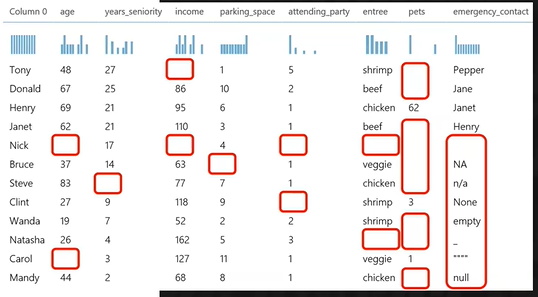

* Missing Values

Use os métodos isna() ou isnull() para identificar células que contêm missing value

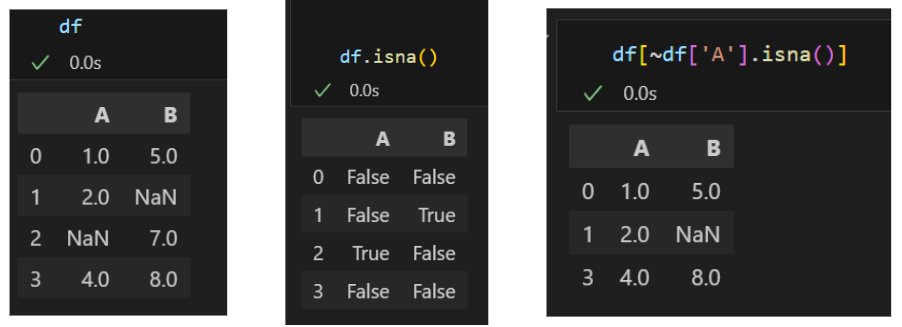